## Credit Card Fraud Detection

---

### 📄 Project Submission  
**Author:** Ankit Surana  
**Date:** 2025-05-24

---


In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

### Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

 

In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

 

The data set is taken from the [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

### Business problem overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

### Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

# Check column names, non-null counts, and data types
df.info()

# Optionally, show a few rows to see how data is represented
df.head()

# Optional: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

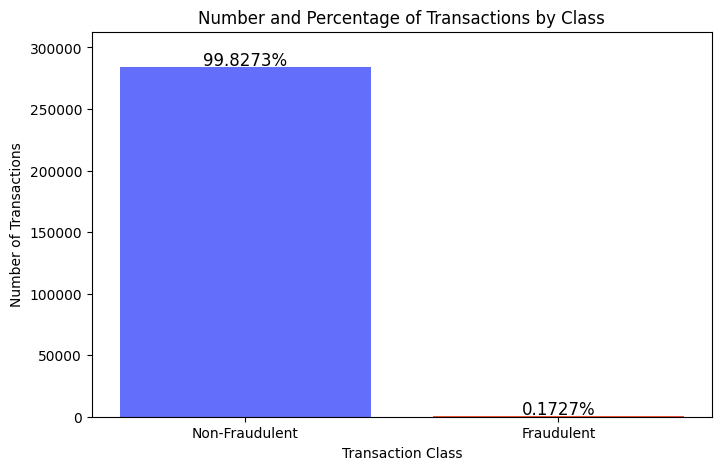

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Labels for the classes
labels = ['Non-Fraudulent', 'Fraudulent']
counts = classes.values
percentages = [normal_share, fraud_share]

# Plotting
plt.figure(figsize=(8,5))
bars = plt.bar(labels, counts, color=['#636EFA', '#EF553B'])

for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000, f'{pct:.4f}%', ha='center', fontsize=12)

plt.title("Number and Percentage of Transactions by Class")
plt.xlabel("Transaction Class")
plt.ylabel("Number of Transactions")
plt.ylim(0, max(counts)*1.1)
plt.show()

Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

/var/folders/wj/6mv1qn417x30s4yzjyy2c12m0000gn/T/ipykernel_65785/3417949523.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df.groupby('time_bin')['Class'].sum().reset_index(name='fraud_count')


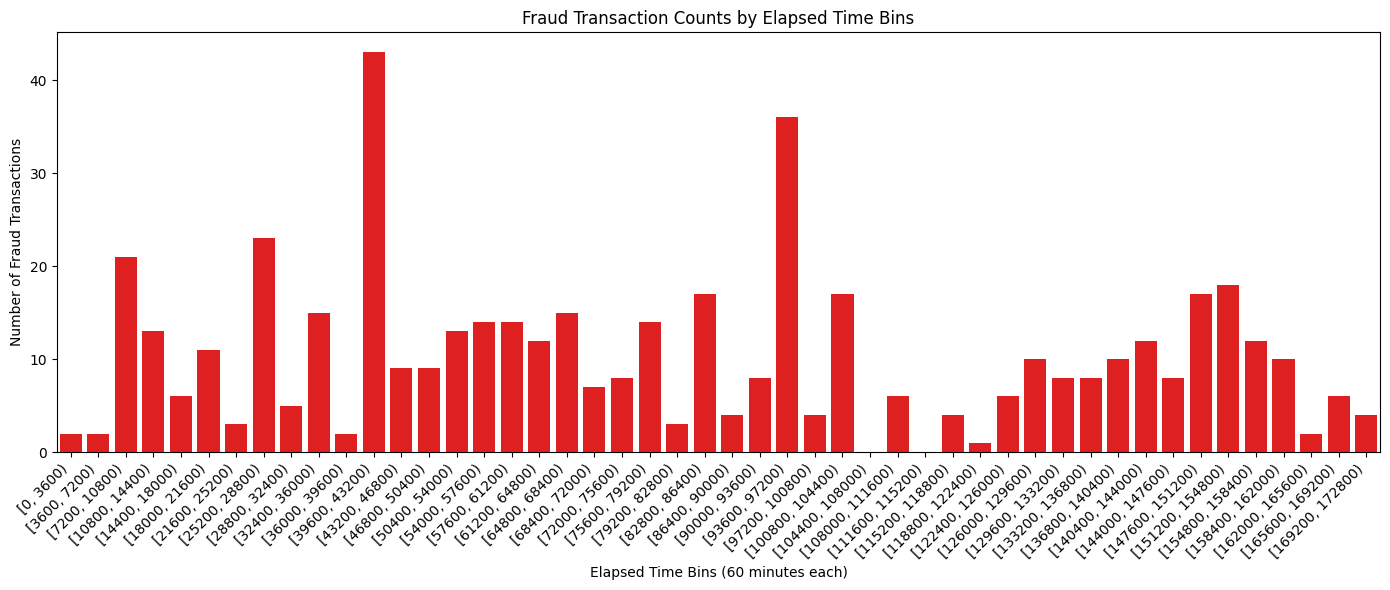

In [6]:
# Create 10-minute bins of elapsed time (600 seconds)
df['time_bin'] = pd.cut(df['Time'], bins=range(0, int(df['Time'].max()) + 3600, 3600), right=False)

# Aggregate fraud counts per bin to see if fraud clusters at certain intervals
fraud_counts = df.groupby('time_bin')['Class'].sum().reset_index(name='fraud_count')

plt.figure(figsize=(14,6))

sns.barplot(x='time_bin', y='fraud_count', data=fraud_counts, color='red')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Elapsed Time Bins (60 minutes each)')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transaction Counts by Elapsed Time Bins')
plt.tight_layout()
plt.show()

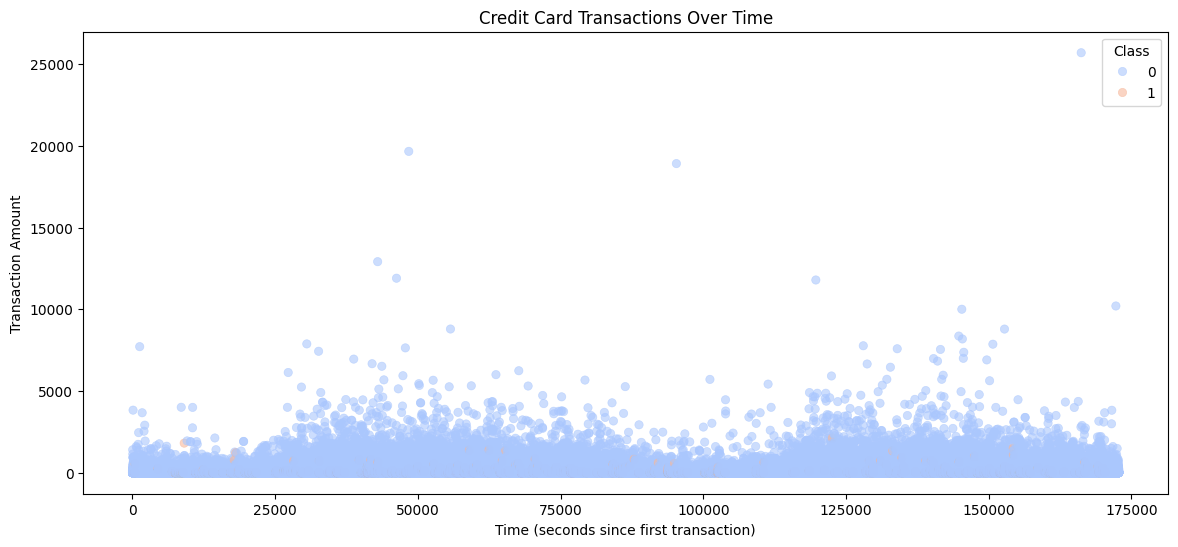

In [7]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize=(14,6))

sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='coolwarm', alpha=0.6, edgecolor=None )

plt.title("Credit Card Transactions Over Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Transaction Amount")
plt.legend(title='Class')
plt.show()

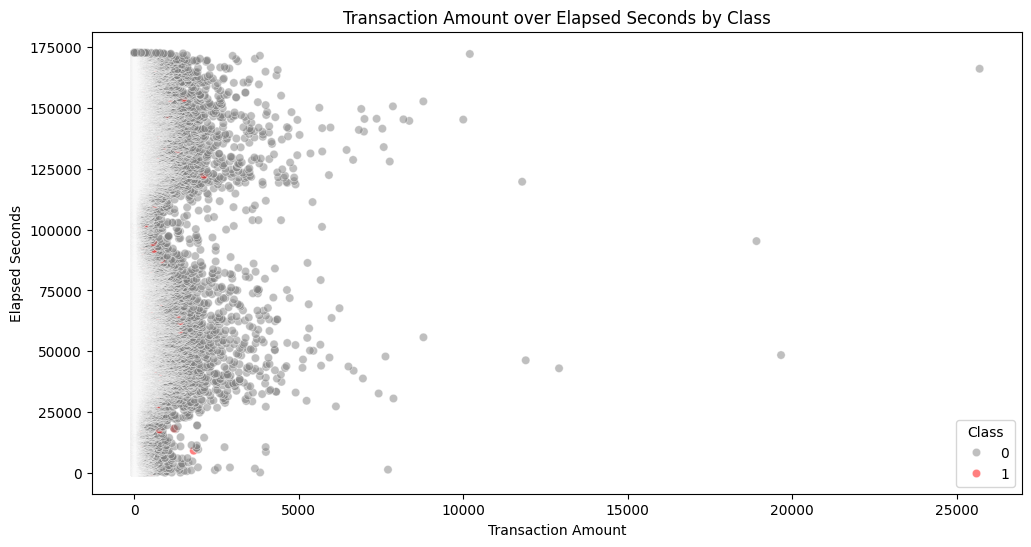

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Amount', 
    y='Time', 
    hue='Class', 
    data=df, 
    alpha=0.5, 
    palette=['grey', 'red']
)
plt.title('Transaction Amount over Elapsed Seconds by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Elapsed Seconds')
plt.legend(title='Class')
plt.show()

In [9]:
# Drop unnecessary columns

columns_to_drop = ['Time']  # already replaced by Elapsed_Hours

# Drop 'Time' since we have 'Elapsed_Hours'
df = df.drop(columns=['Time'])

print("Remaining columns:", df.columns.tolist())

Remaining columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'time_bin']


### Splitting the data into train & test data

In [10]:
# y = class variable (Class column: 0 = Non-Fraud, 1 = Fraud)
y = df['Class']

# X = all other columns except the target, time_bin
X = df.drop(columns=['Class','time_bin'])

In [11]:
from sklearn import model_selection

# Splitting the dataset into training and testing sets. To ensures that the split maintains the distribution of the target variable (y) we use stratify
X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y )

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

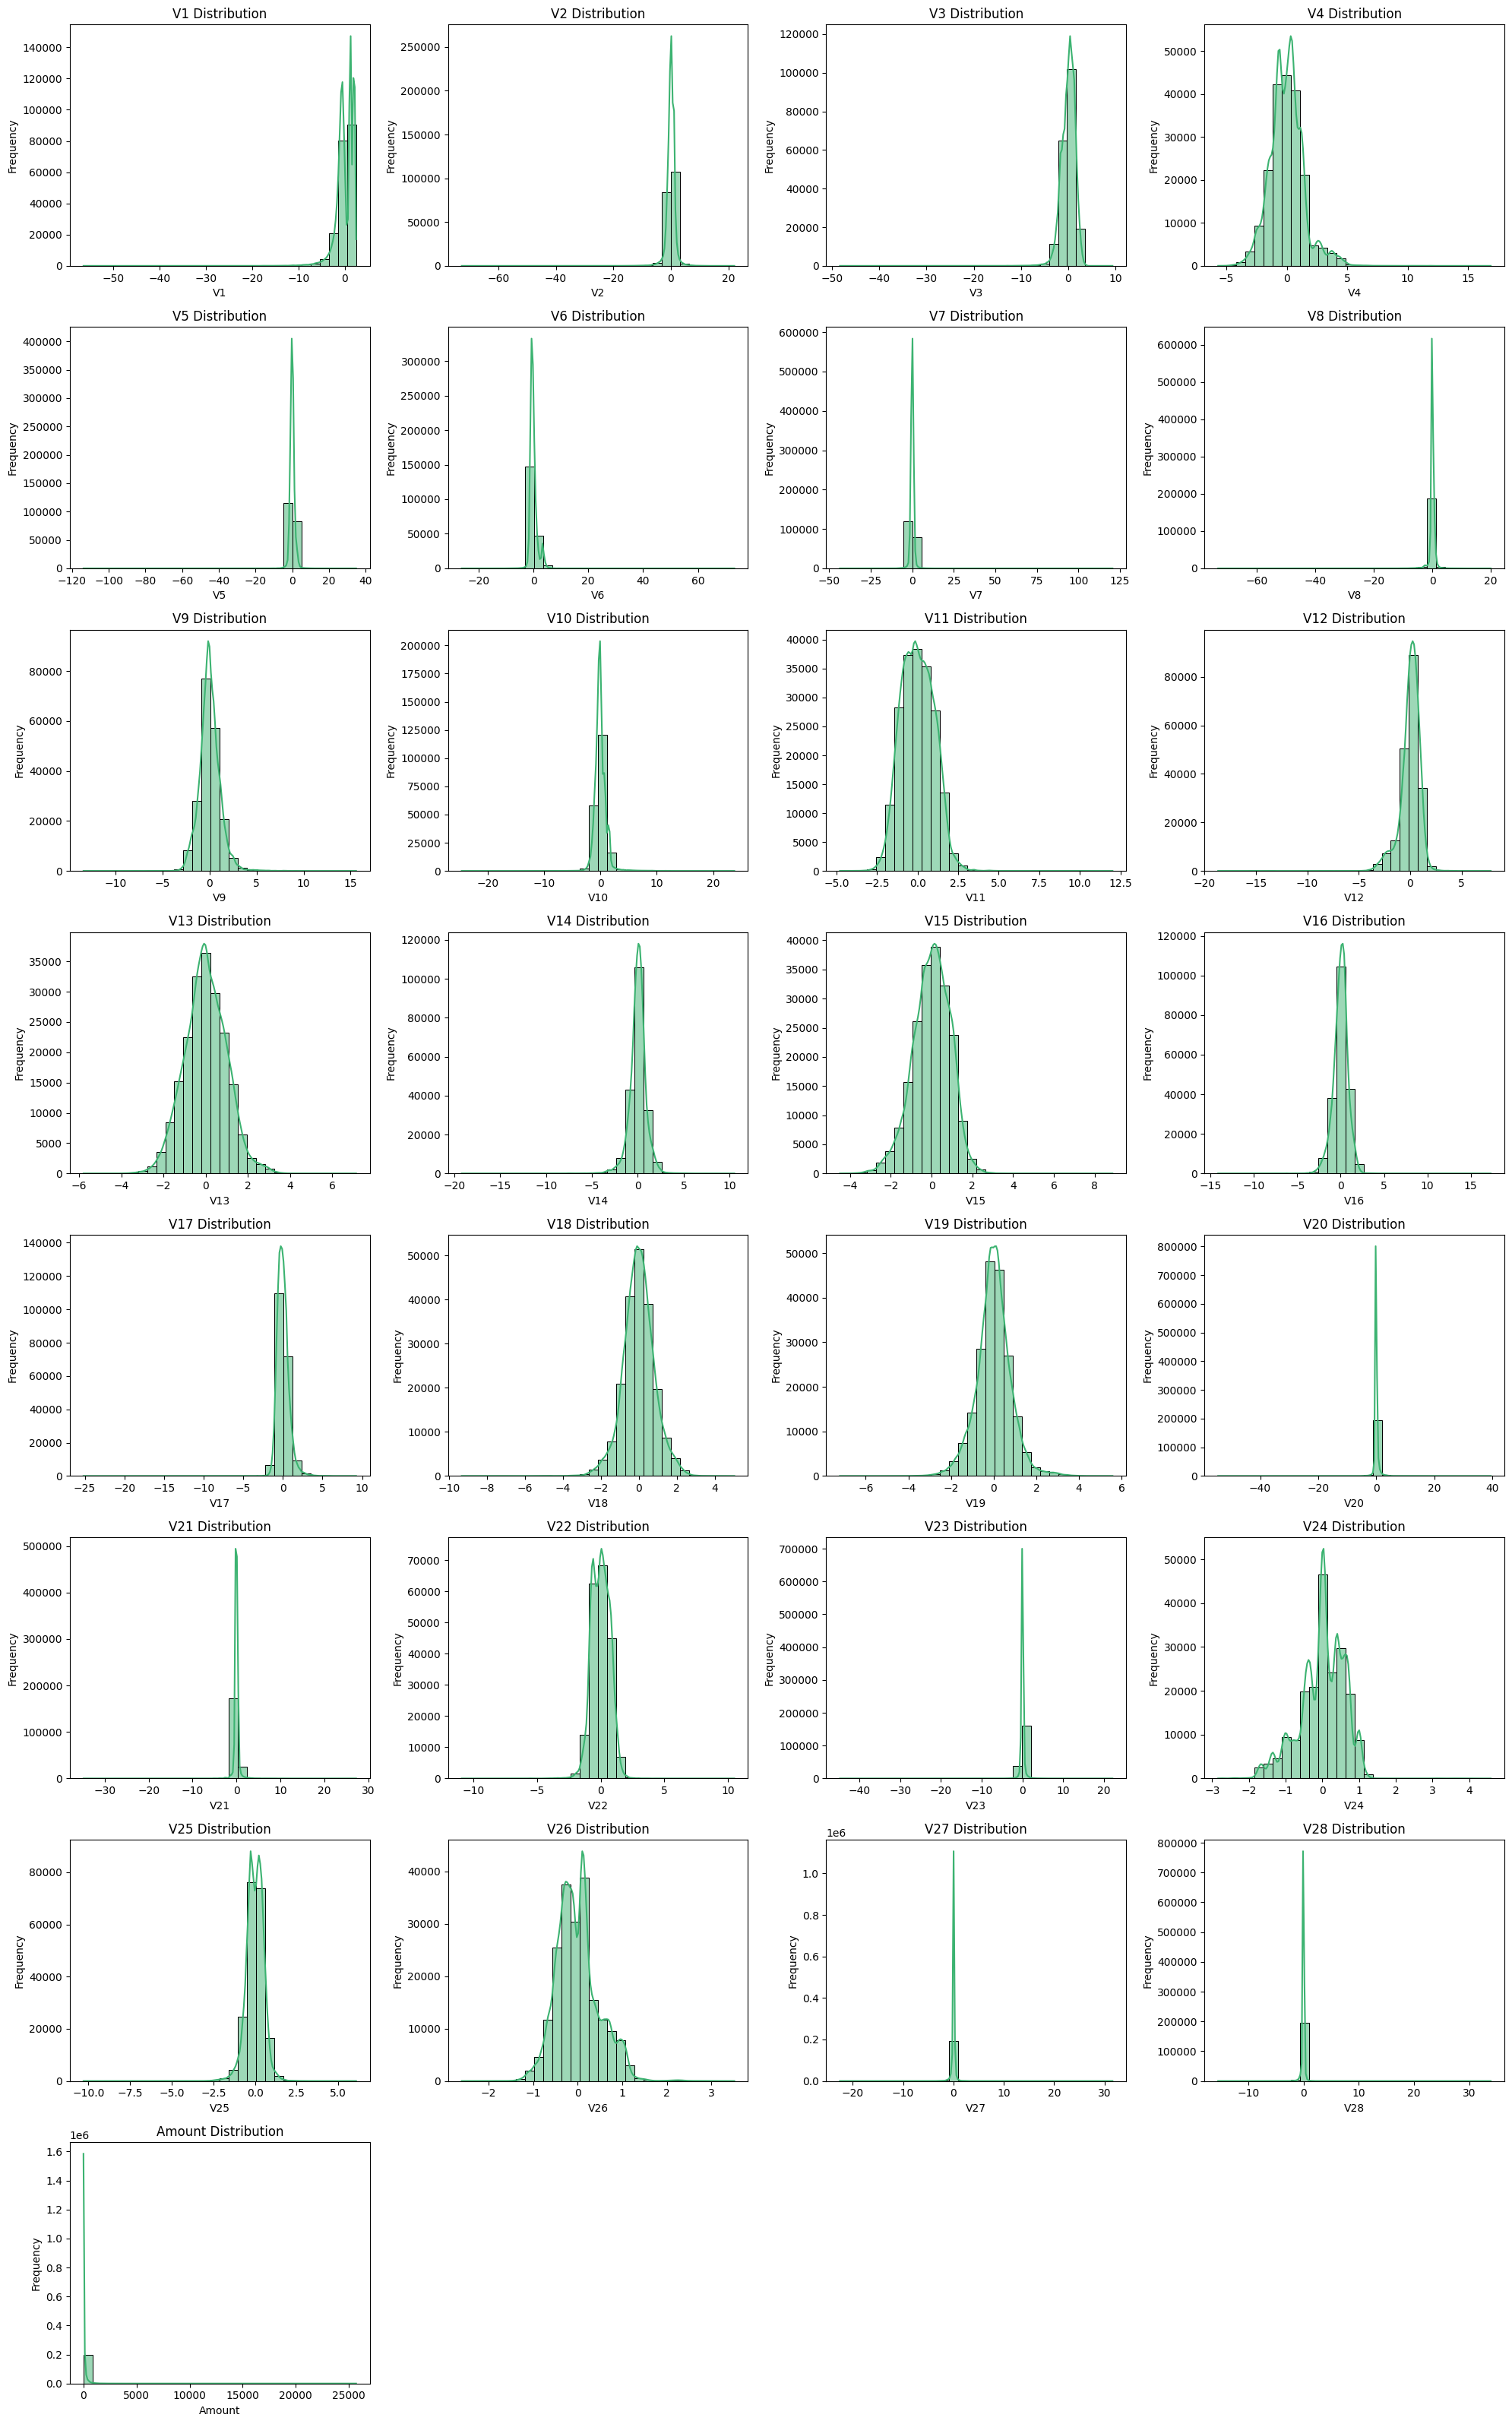

In [13]:
# plot the histogram of a variable from the dataset to see the skewness

variables = [col for col in X_train.columns if col not in ['Class', 'time_bin']]

num_vars = len(variables)
cols = 4  # 4 plots per row for better fit
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X_train[var], bins=30, kde=True, color='mediumseagreen')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### These distributions resemble Gaussian (bell-shaped) curves:

>  V9, V10, V11, V13, V15, V18, V19, V26 
→ Likely have low skewness (close to 0), suggesting normality.

#### Positively Skewed (Right-Skewed) These features have long right tails: 

>  V2, V3, V5, V6, V8, V20, V21, V27, V28, Amount
→ Right-skewed, likely mean > median. Notably, Amount is heavily skewed.

#### Negatively Skewed (Left-Skewed) These features have long left tails:

> V1, V7, V12, V14, V17, V22, V23
→ Left-skewed, mean < median.

#### Near-Zero or Unclear Skew Some features have sharp peaks or dense clustering near zero:

> V4, V16, V24, V25
→ May be kurtotic (peaked) or contain many zero/low values.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [14]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer

# Exclude 'Timebins' and keep only continuous numeric features
excluded_cols = ['Class', 'time_bin']
numeric_cols = X_train.drop(columns=excluded_cols, errors='ignore').select_dtypes(include=['float64', 'int64']).columns

# Identify skewed features from numeric columns
skewed_features = X_train[numeric_cols].skew().abs()
skewed_features = skewed_features[skewed_features > 0.5].index.tolist()

# Apply PowerTransformer only to skewed numeric features
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

X_train[skewed_features] = pt.fit_transform(X_train[skewed_features])
X_test[skewed_features] = pt.transform(X_test[skewed_features])

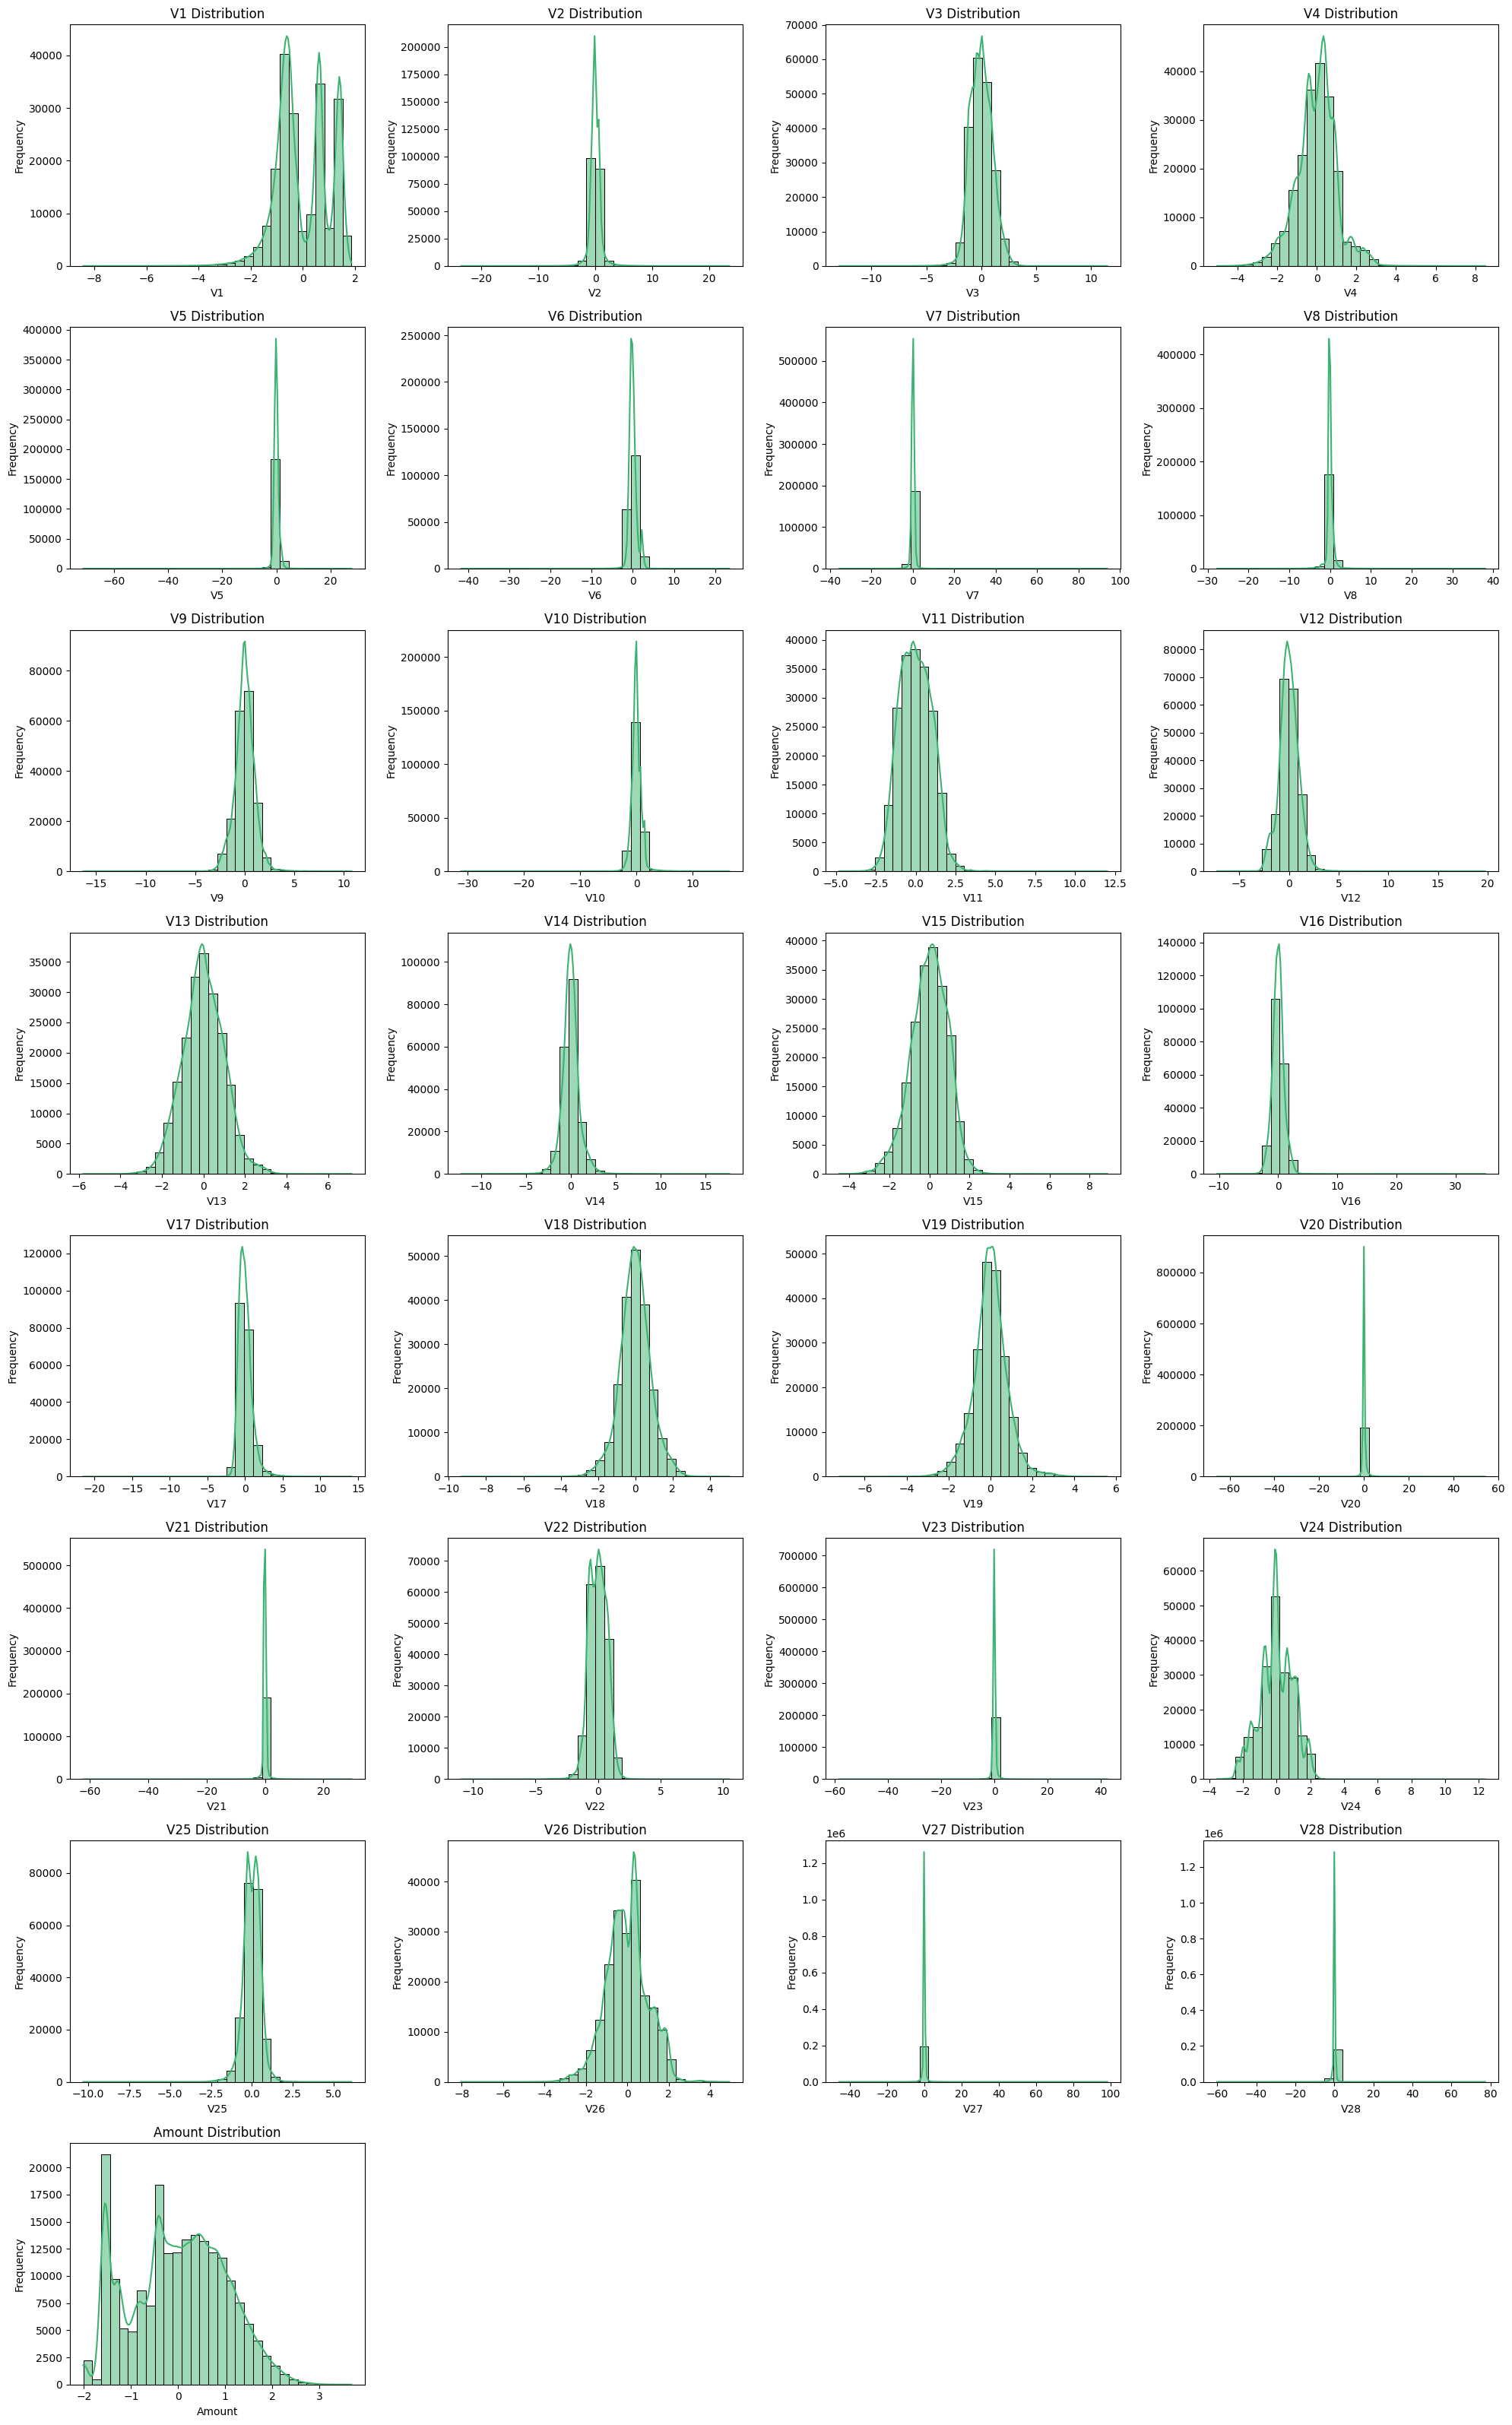

In [15]:
# plot the histogram of a variable from the dataset again to see the result 

variables = [col for col in X_train.columns if col not in ['Class', 'time_bin']]

num_vars = len(variables)
cols = 4  # 4 plots per row for better fit
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X_train[var], bins=30, kde=True, color='mediumseagreen')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Reduced Skewness
→ Most features that were previously left- or right-skewed are now closer to symmetric.

#### More Gaussian-like Distributions
→ Histograms now show bell-shaped curves, approximating a normal distribution.

#### Centering Around Zero
→ Features are now centered near 0, indicating mean normalization.

#### Compressed Outliers
→ Extreme values have been pulled closer to the center, reducing the impact of outliers.

#### Variance Stabilization
→ Spread across the features is more consistent, which helps with model convergence.

#### Smoother Peaks
→ Previously spiky or flat distributions now have a more regular, smooth peak.

#### Amount Feature Improved
→ The Amount feature, which was heavily right-skewed, now appears more balanced and symmetric.

## Model Building
- Build different models on the imbalanced dataset and see the result

In [16]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import GridSearchCV, StratifiedKFold

num_C = [0.001, 0.01, 0.1, 1, 10, 100]  
cv_num = [3, 5, 7, 10]
results={}

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [17]:
# Stratified split for cross-validation train-test within your train data
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split( X_train, y_train, train_size=0.7, test_size=0.3, stratify=y_train, random_state=42 )

In [18]:
# Initialize Logistic Regression model with balanced class weights to handle imbalanced data
lr_model = linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define hyperparameter grid for tuning: regularization strength 'C' and penalty type
lr_params = {
    'C': num_C, # list or range of values for the inverse of regularization strength
    'penalty': ['l1', 'l2'] # types of regularization to try
}

# Prepare a list to store results for Logistic Regression across different cross-validation folds
results['Logistic Regression'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Set up GridSearchCV with Logistic Regression, hyperparameter grid, ROC AUC scoring,
    # and Stratified K-Fold cross-validation to preserve class distribution in each fold
    grid = GridSearchCV(lr_model, lr_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Logistic Regression'].append({
        'model': 'Logistic Regression',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

The following models will be used for training: 
> Logistic Regression, KNN, Decision Tree, Random Forest, and XGBoost.

These models offer a good balance between training speed, scalability, and performance on structured/tabular data.
- Logistic Regression provides a strong baseline with interpretability and performs well on linearly separable data.
- KNN is simple and effective, especially after normalization, although it can be slower at prediction time.
- Decision Tree offers fast training and can capture non-linear patterns but may overfit.
- Random Forest improves upon this by averaging multiple trees, reducing overfitting while maintaining interpretability.
- XGBoost is highly optimized and often delivers state-of-the-art performance on tabular datasets with fast training and built-in regularization.

**SVM, while powerful for smaller or well-separated datasets, is excluded due to its high training time and poor scalability on large datasets.Its non-parallelizable nature and quadratic to cubic time complexity make it inefficient compared to other models for this use case.**


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree model
# - criterion="gini": Uses Gini impurity to measure the quality of a split
# - class_weight='balanced': Adjusts weights inversely proportional to class frequencies to handle class imbalance
# - random_state=42: Ensures reproducibility of results
dt_model = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state=42)

# Defining a parameter grid for hyperparameter tuning
# - max_depth: Controls the maximum depth of the tree to prevent overfitting
# - min_samples_split: Minimum number of samples required to split an internal node
dt_params = {
    'max_depth': [5, 15, 10, 20, 30],
    'min_samples_split': [10, 25, 50, 100]
}

# Prepare a list to store results for Decision Tree across different cross-validation folds
results['Decision Tree'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num :
    # Performing grid search with cross-validation
    # - scoring='roc_auc': Evaluates models based on ROC AUC score
    # - StratifiedKFold: Ensures each fold has a representative distribution of the target variable
    # - n_jobs=-1: Utilizes all available CPU cores for faster computation
    grid = GridSearchCV(dt_model, dt_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters
    grid.fit(X_train_cv, y_train_cv)

    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Decision Tree'].append({
        'model': 'Decision Tree',
        'cv' : cv,
        'roc_auc': grid.best_score_, # Best ROC AUC score across folds
        'best_params': grid.best_params_ # Hyperparameters that yielded the best score
    })

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with default parameters
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for tuning:
# - 'n_neighbors': number of neighbors to consider
# - 'weights': uniform (equal) or distance-based weighting
# - 'p': power parameter for Minkowski metric (1 = Manhattan, 2 = Euclidean)
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)
}

# Prepare a list to store results for KNN across different cross-validation folds
results['KNN'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Setup GridSearchCV with KNN model, parameter grid, and ROC AUC metric,
    # using Stratified K-Fold to maintain class distribution, and leveraging parallel processing
    grid = GridSearchCV(knn_model, knn_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters
    grid.fit(X_train_cv, y_train_cv)

    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['KNN'].append({
        'model': 'KNN',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model with balanced class weights to handle class imbalance,
# fixed random seed for reproducibility, and n_jobs=-1 to use all CPU cores for parallel processing
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Define hyperparameter grid for tuning:
# - 'n_estimators': number of trees in the forest
# - 'max_depth': maximum depth of each tree (None means nodes expanded until all leaves are pure)
# - 'min_samples_split': minimum samples required to split an internal node
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5]
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['Random Forest'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num :
    # Setup GridSearchCV with Random Forest, hyperparameter grid, and ROC AUC scoring metric,
    # using Stratified K-Fold CV to preserve class balance and parallel processing for speed
    grid = GridSearchCV(rf_model, rf_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters 
    grid.fit(X_train_cv, y_train_cv)

    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Random Forest'].append({
        'model': 'Random Forest',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [22]:
from xgboost import XGBClassifier

# Initialize XGBoost model with default parameters
xgb_model = XGBClassifier()

# Define hyperparameter grid for tuning:
# - 'n_estimators': number of boosting rounds (trees)
# - 'max_depth': maximum tree depth to control model complexity
# - 'learning_rate': step size shrinkage to prevent overfitting
# - 'subsample': fraction of training samples used for growing each tree (helps reduce overfitting)
xgb_params = {
    'n_estimators': [50, 100,200],
    'max_depth': [2, 3, 5, 10],
    'learning_rate': [0.1, 0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}

# Prepare a list to store results for XGBoost across different cross-validation folds
results['XGBoost'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num :
    # Configure GridSearchCV with XGBoost model, hyperparameter grid, and ROC AUC scoring,
    # using Stratified K-Fold cross-validation to maintain class distribution,
    # and leveraging parallel computation with n_jobs=-1   
    grid = GridSearchCV(xgb_model, xgb_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters 
    grid.fit(X_train_cv, y_train_cv)

    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['XGBoost'].append({
        'model': 'XGBoost',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

### Combine Hyperparameter Tuning Results from Multiple Models into a Single DataFrame

In [23]:
from IPython.display import display

# Initialize an empty list to collect DataFrames from each model
df_list = []

# Loop through each model in your results dictionary
for model_name, model_results in results.items():
    # Convert model's list of dicts to DataFrame
    df_model = pd.DataFrame(model_results)
    
    # Add a column for the model name with CV appended, e.g., "KNN_5"
    df_model['model_cv'] = df_model.apply(lambda row: f"{model_name}_{row['cv']}", axis=1)
    
    # Append this model's DataFrame to the list
    df_list.append(df_model)

# Concatenate all model DataFrames into one big DataFrame, row-wise
df_all_results = pd.concat(df_list, ignore_index=True)

# Reorder columns if you like, e.g., model_cv first
df_all_results = df_all_results[['model_cv', 'model', 'cv', 'roc_auc', 'best_params']]

# Sorted by ROC AUC (descending) to highlight best performers
df_all_results = df_all_results.sort_values(by="roc_auc", ascending=False)

# Pretty print
print("\n📊 Model Comparison (Sorted by ROC AUC):")
display(df_all_results)


📊 Model Comparison (Sorted by ROC AUC):


,model_cv,model,cv,roc_auc,best_params
19,XGBoost_10,XGBoost,10,0.985103,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."
18,XGBoost_7,XGBoost,7,0.983559,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."
17,XGBoost_5,XGBoost,5,0.983223,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti..."
13,Random Forest_5,Random Forest,5,0.981645,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
14,Random Forest_7,Random Forest,7,0.980505,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
16,XGBoost_3,XGBoost,3,0.979331,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."
2,Logistic Regression_7,Logistic Regression,7,0.979175,"{'C': 0.001, 'penalty': 'l1'}"
12,Random Forest_3,Random Forest,3,0.978958,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
15,Random Forest_10,Random Forest,10,0.978883,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,Logistic Regression_5,Logistic Regression,5,0.978472,"{'C': 0.001, 'penalty': 'l1'}"


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [25]:
# Pick the top model from sorted results
best_model = df_all_results.index[0]
best_model_name = df_all_results.loc[best_model, 'model']
best_params = df_all_results.loc[best_model, 'best_params']

print(f"\n✅ Proceeding with best model: {best_model_name}")
print(f"🔧 Best hyperparameters: {best_params}")


✅ Proceeding with best model: XGBoost
🔧 Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.3}


In [26]:
clf = XGBClassifier(**best_params) #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

# Use predicted probabilities if available
if hasattr(clf, "predict_proba"):
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"\n🧪 ROC AUC on test set: {roc_auc:.4f}")

# Accuracy and classification report
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy on test set: {acc:.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred)) 


🧪 ROC AUC on test set: 0.9674
✅ Accuracy on test set: 0.9994

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.72      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### Model Performance Summary

The model performed very well on the test set:

* **ROC AUC:** 0.9674 — shows the model can clearly tell the two classes apart.
* **Accuracy:** 99.94% — almost all predictions are correct.

For the two classes:

* Class 0 (majority) has perfect scores — it’s predicted almost without any errors.
* Class 1 (minority) has good precision (0.91), meaning when the model predicts this class, it’s usually right. The recall is 0.72, so it misses some real positive cases.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


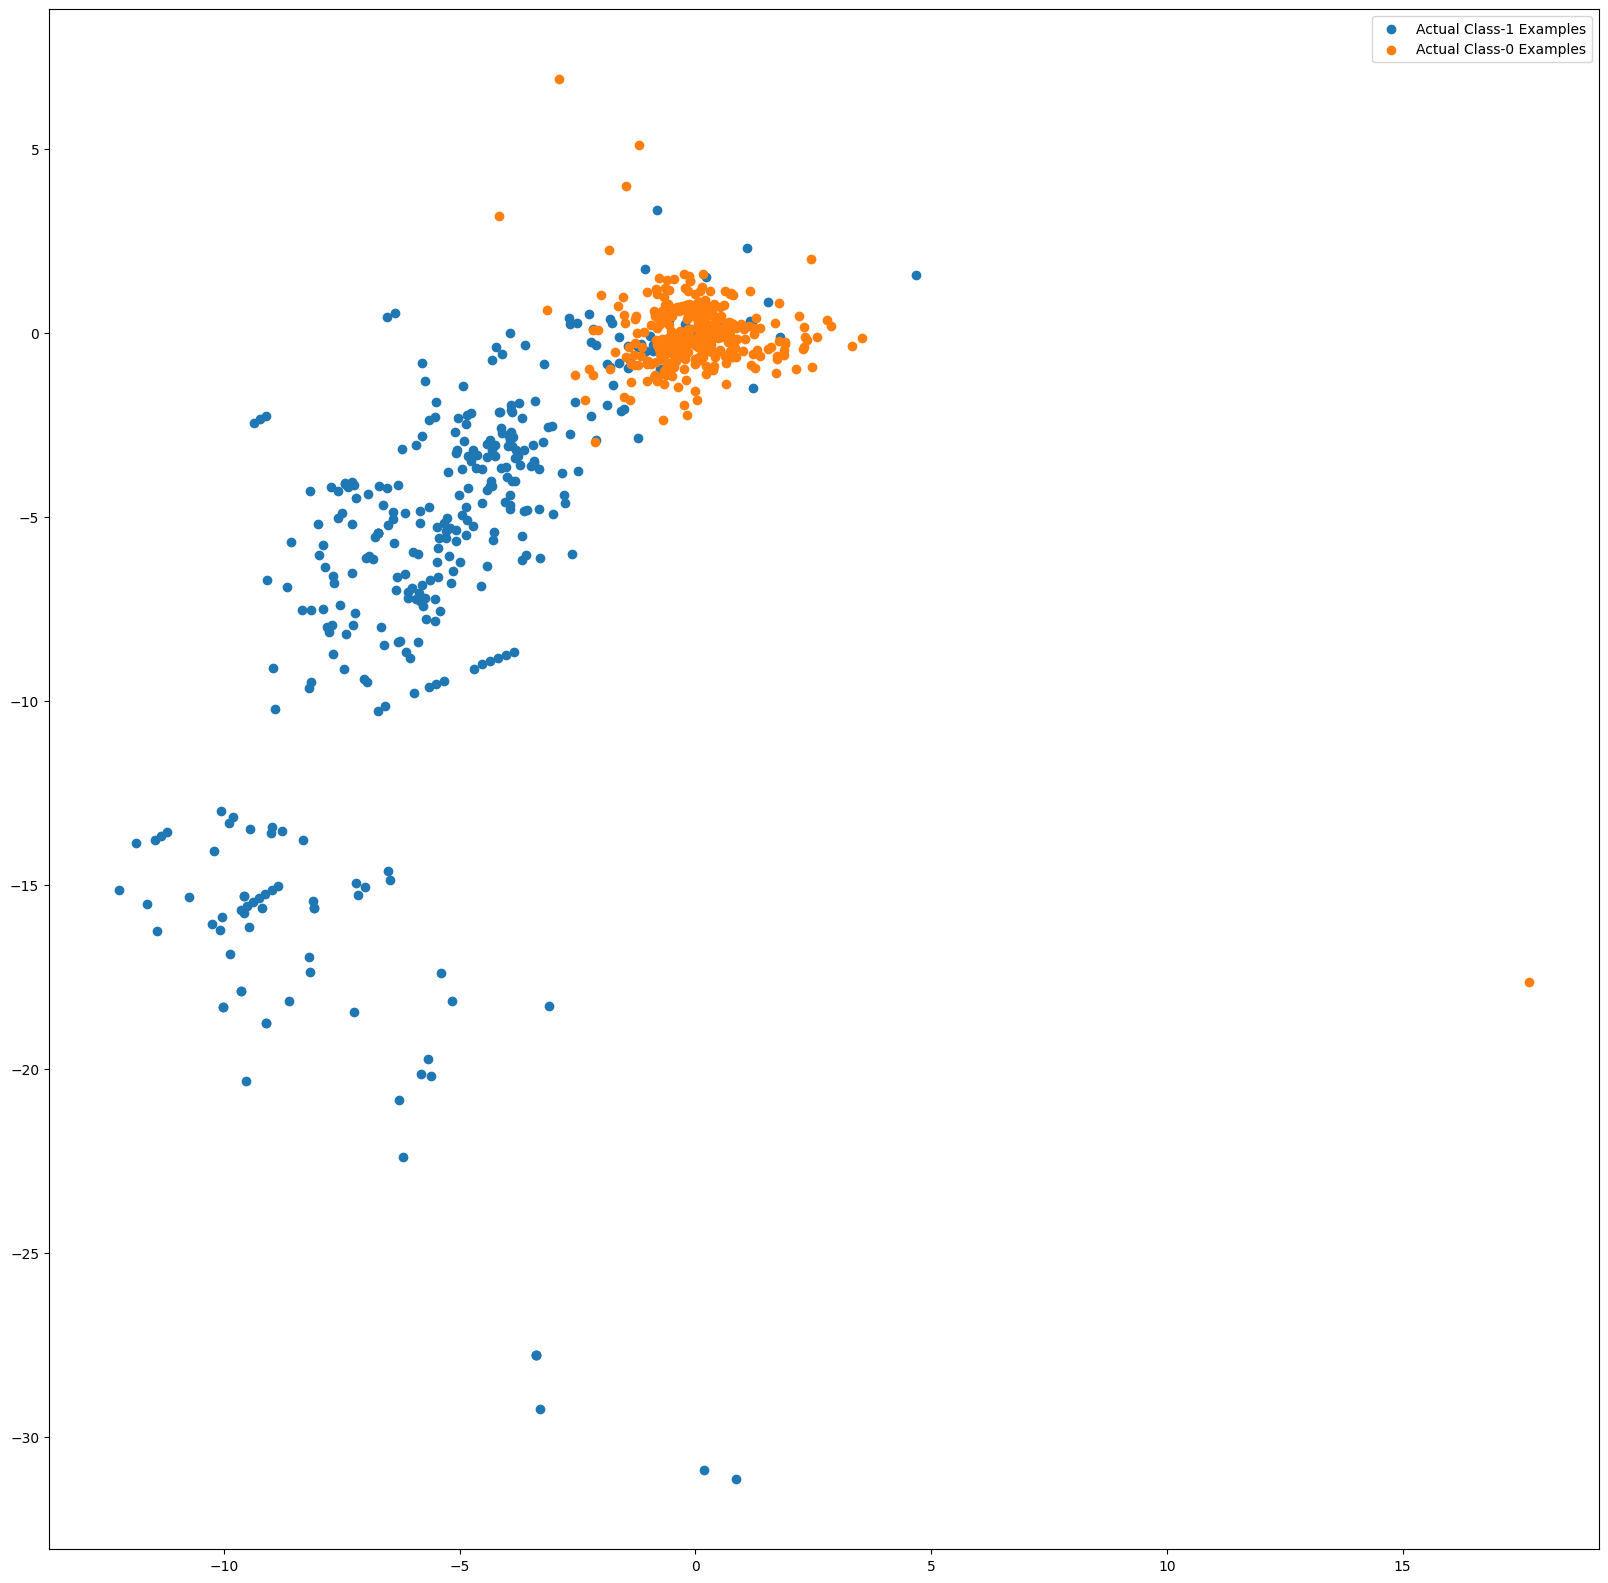

In [31]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

**Observation:**

The plot shows that **Class-0 examples (orange)** form a **tight, dense cluster**, while **Class-1 examples (blue)** are **more dispersed**, suggesting that the top two features provide strong class separation, but Class-1 exhibits higher variability.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

We will proceed with **class balancing techniques** (e.g., Random Over Sampling, SMOTE) on the **top three performing models from Stage 1**, which include:

* **Logistic Regression**
* **XGBoost Classifier**
* **Random Forest Classifier**

These models demonstrated promising baseline performance despite the significant class imbalance inherent in the **credit card fraud detection dataset**, where fraudulent transactions represent a small fraction of the total data. Addressing this imbalance is crucial to improve sensitivity (recall) and reduce false negatives, which are particularly costly in fraud detection.

We will **not continue with K-Nearest Neighbors (KNN)** or **Decision Tree Classifier** in the next stage, as their initial performance was suboptimal, likely due to sensitivity to skewed class distributions and lack of robustness compared to ensemble and linear models in high-dimensional, imbalanced settings.

By focusing on the strongest models and enhancing them with balanced training data, we aim to build more reliable and generalizable fraud detection systems.

In [32]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.001, 0.01, 0.1, 1, 10, 100]  
cv_num = [3, 5, 7, 10]
results={}

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [33]:
#perform cross validation
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split( X_train, y_train, train_size=0.7, test_size=0.3, stratify=y_train, random_state=42)

### Random Oversampling

In [34]:
from imblearn import over_sampling 
from imblearn.pipeline import Pipeline

# Define hyperparameter grid for tuning: regularization strength 'C' and penalty type
lr_params = {
    'classifier__C': num_C,
    'classifier__penalty': ['l1', 'l2']
}

# Prepare a list to store results for Logistic Regression across different cross-validation folds
results['Logistic Regression ROS'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Create a pipeline with:
    # 1. RandomOverSampler to balance the class distribution
    # 2. Logistic Regression classifier with balanced class weights    
    pipeline = Pipeline([
        ('balancing', over_sampling.RandomOverSampler(random_state=42)),
        ('classifier', linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
    ])

    # Set up GridSearchCV with Logistic Regression, hyperparameter grid, ROC AUC scoring,
    # and Stratified K-Fold cross-validation to preserve class distribution in each fold
    grid = GridSearchCV(estimator=pipeline, param_grid=lr_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters    
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Logistic Regression ROS'].append({
        'model': 'Logistic Regression',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [73]:
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['Logistic Regression ROS'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, **best_params)
final_model.fit(X_train_ros, y_train_ros)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9787283207842563
Best Hyperparameters: {'C': 0.001, 'penalty': 'l1'}
Test ROC AUC: 0.991086732443107


In [35]:
# Define hyperparameter grid for Random Forest inside the pipeline
rf_params = {
    'classifier__n_estimators': [50, 100], # Number of trees in the forest
    'classifier__max_depth': [5, 10, 15, 20], # Max depth of each tree
    'classifier__min_samples_split': [2, 5] # Minimum samples required to split a node
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['Random Forest ROS'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Define a pipeline that first applies RandomOverSampler for class balancing,
    # then fits the Random Forest classifier
    pipeline = Pipeline([
        ('balancing', over_sampling.RandomOverSampler(random_state=42)),
        ('classifier',  RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
    ])

    # Setup GridSearchCV to tune hyperparameters using ROC AUC as the evaluation metric,
    # with StratifiedKFold CV to preserve class distribution, and parallel processing enabled
    grid = GridSearchCV(estimator=pipeline, param_grid=rf_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)

    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters    
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Random Forest ROS'].append({
        'model': 'Random Forest',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [74]:
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['Random Forest ROS'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1, **best_params)
final_model.fit(X_train_ros, y_train_ros)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9804995487076809
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Test ROC AUC: 0.9833417915740962


In [36]:
# Define hyperparameter grid for XGBoost inside the pipeline
xgb_params = {
    'classifier__n_estimators': [50, 100,200],
    'classifier__max_depth': [2, 3, 5, 10],
    'classifier__learning_rate': [0.1, 0.2, 0.6],
    'classifier__subsample': [0.3, 0.6, 0.9]
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['XGBoost ROS'] = []

for cv in cv_num : 
    # Define a pipeline that first applies RandomOverSampler for class balancing, then fits the  XGBoost
    pipeline = Pipeline([
        ('balancing', over_sampling.RandomOverSampler(random_state=42)),
        ('classifier',  XGBClassifier())
    ])

    # Setup GridSearchCV to tune hyperparameters using ROC AUC as the evaluation metric,
    # with StratifiedKFold CV to preserve class distribution, and parallel processing enabled
    grid = GridSearchCV(estimator=pipeline, param_grid=xgb_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters        
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['XGBoost ROS'].append({
        'model': 'XGBoost',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [75]:
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['XGBoost ROS'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_ros, y_train_ros)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9821499380814999
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.6}
Test ROC AUC: 0.9761887378510692


### Print the class distribution after applying SMOTE 

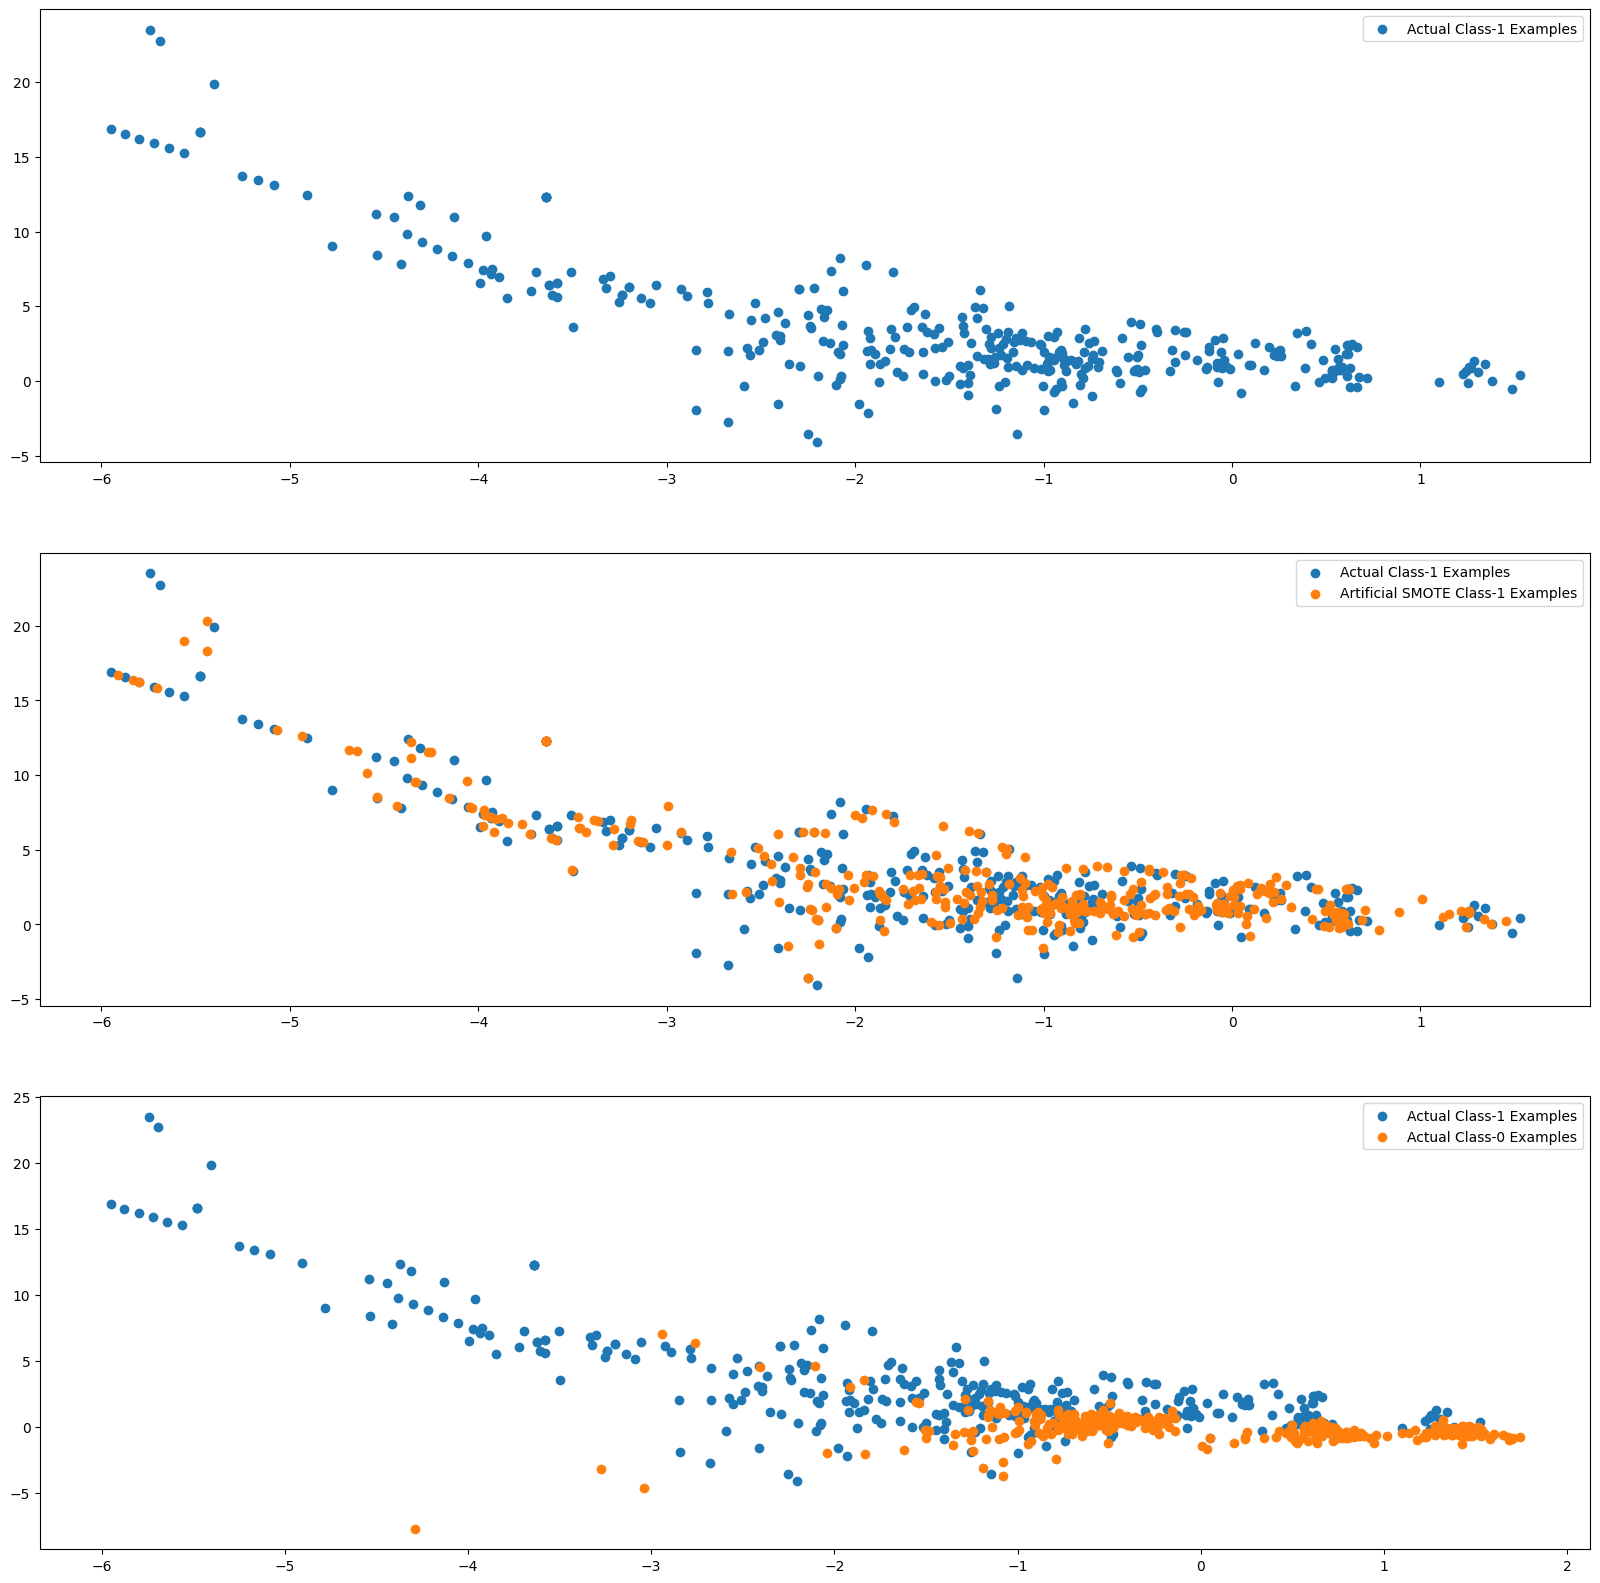

In [37]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

- **Top Plot** : The original, minority class distribution.

- **Middle Plot** : How SMOTE generates synthetic samples to augment the minority class, making it more densely populated in the feature space.

- **Bottom Plot**: The original imbalanced distribution, showing the stark difference in the number of samples between the majority (Class 0) and minority (Class 1) classes, which necessitated the use of SMOTE.

In [39]:
from imblearn import over_sampling 
from imblearn.pipeline import Pipeline

# Define hyperparameter grid for tuning: regularization strength 'C' and penalty type
lr_params = {
    'classifier__C': num_C,
    'classifier__penalty': ['l1', 'l2']
}

# Prepare a list to store results for Logistic Regression across different cross-validation folds
results['Logistic Regression SMOTE'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Create a pipeline with:
    # 1. SMOTE to balance the class distribution
    # 2. Logistic Regression classifier with balanced class weights    
    pipeline = Pipeline([
        ('balancing', over_sampling.SMOTE(random_state=42)),
        ('classifier', linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
    ])

    # Set up GridSearchCV with Logistic Regression, hyperparameter grid, ROC AUC scoring,
    # and Stratified K-Fold cross-validation to preserve class distribution in each fold
    grid = GridSearchCV(estimator=pipeline, param_grid=lr_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters    
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Logistic Regression SMOTE'].append({
        'model': 'Logistic Regression',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [79]:
smote = over_sampling.SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['Logistic Regression SMOTE'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, **best_params)
final_model.fit(X_train_smote, y_train_smote)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.97791029674743
Best Hyperparameters: {'C': 0.001, 'penalty': 'l1'}
Test ROC AUC: 0.988713492636615


##### Build models on other algorithms to see the better performing on SMOTE

In [40]:
# Define hyperparameter grid for Random Forest inside the pipeline
rf_params = {
    'classifier__n_estimators': [50, 100], # Number of trees in the forest
    'classifier__max_depth': [5, 10, 15, 20], # Max depth of each tree
    'classifier__min_samples_split': [2, 5] # Minimum samples required to split a node
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['Random Forest SMOTE'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Define a pipeline that first applies RandomOverSampler for class balancing,
    # then fits the Random Forest classifier
    pipeline = Pipeline([
        ('balancing', over_sampling.SMOTE(random_state=42)),
        ('classifier',  RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
    ])

    # Setup GridSearchCV to tune hyperparameters using ROC AUC as the evaluation metric,
    # with StratifiedKFold CV to preserve class distribution, and parallel processing enabled
    grid = GridSearchCV(estimator=pipeline, param_grid=rf_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)

    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters    
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Random Forest SMOTE'].append({
        'model': 'Random Forest',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [84]:
smote = over_sampling.SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['Random Forest SMOTE'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1, **best_params)
final_model.fit(X_train_smote, y_train_smote)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9820617184416379
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Test ROC AUC: 0.9847231325919893


In [41]:
# Define hyperparameter grid for XGBoost inside the pipeline
xgb_params = {
    'classifier__n_estimators': [50, 100,200],
    'classifier__max_depth': [2, 3, 5, 10],
    'classifier__learning_rate': [0.1, 0.2, 0.6],
    'classifier__subsample': [0.3, 0.6, 0.9]
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['XGBoost SMOTE'] = []

for cv in cv_num : 
    # Define a pipeline that first applies SMOTE for class balancing, then fits the  XGBoost
    pipeline = Pipeline([
        ('balancing', over_sampling.SMOTE(random_state=42)),
        ('classifier',  XGBClassifier())
    ])

    # Setup GridSearchCV to tune hyperparameters using ROC AUC as the evaluation metric,
    # with StratifiedKFold CV to preserve class distribution, and parallel processing enabled
    grid = GridSearchCV(estimator=pipeline, param_grid=xgb_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters        
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['XGBoost SMOTE'].append({
        'model': 'XGBoost',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [78]:
smote = over_sampling.SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['XGBoost SMOTE'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_smote, y_train_smote)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.981510774684301
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50, 'subsample': 0.6}
Test ROC AUC: 0.9891094391202605


### Print the class distribution after applying ADASYN

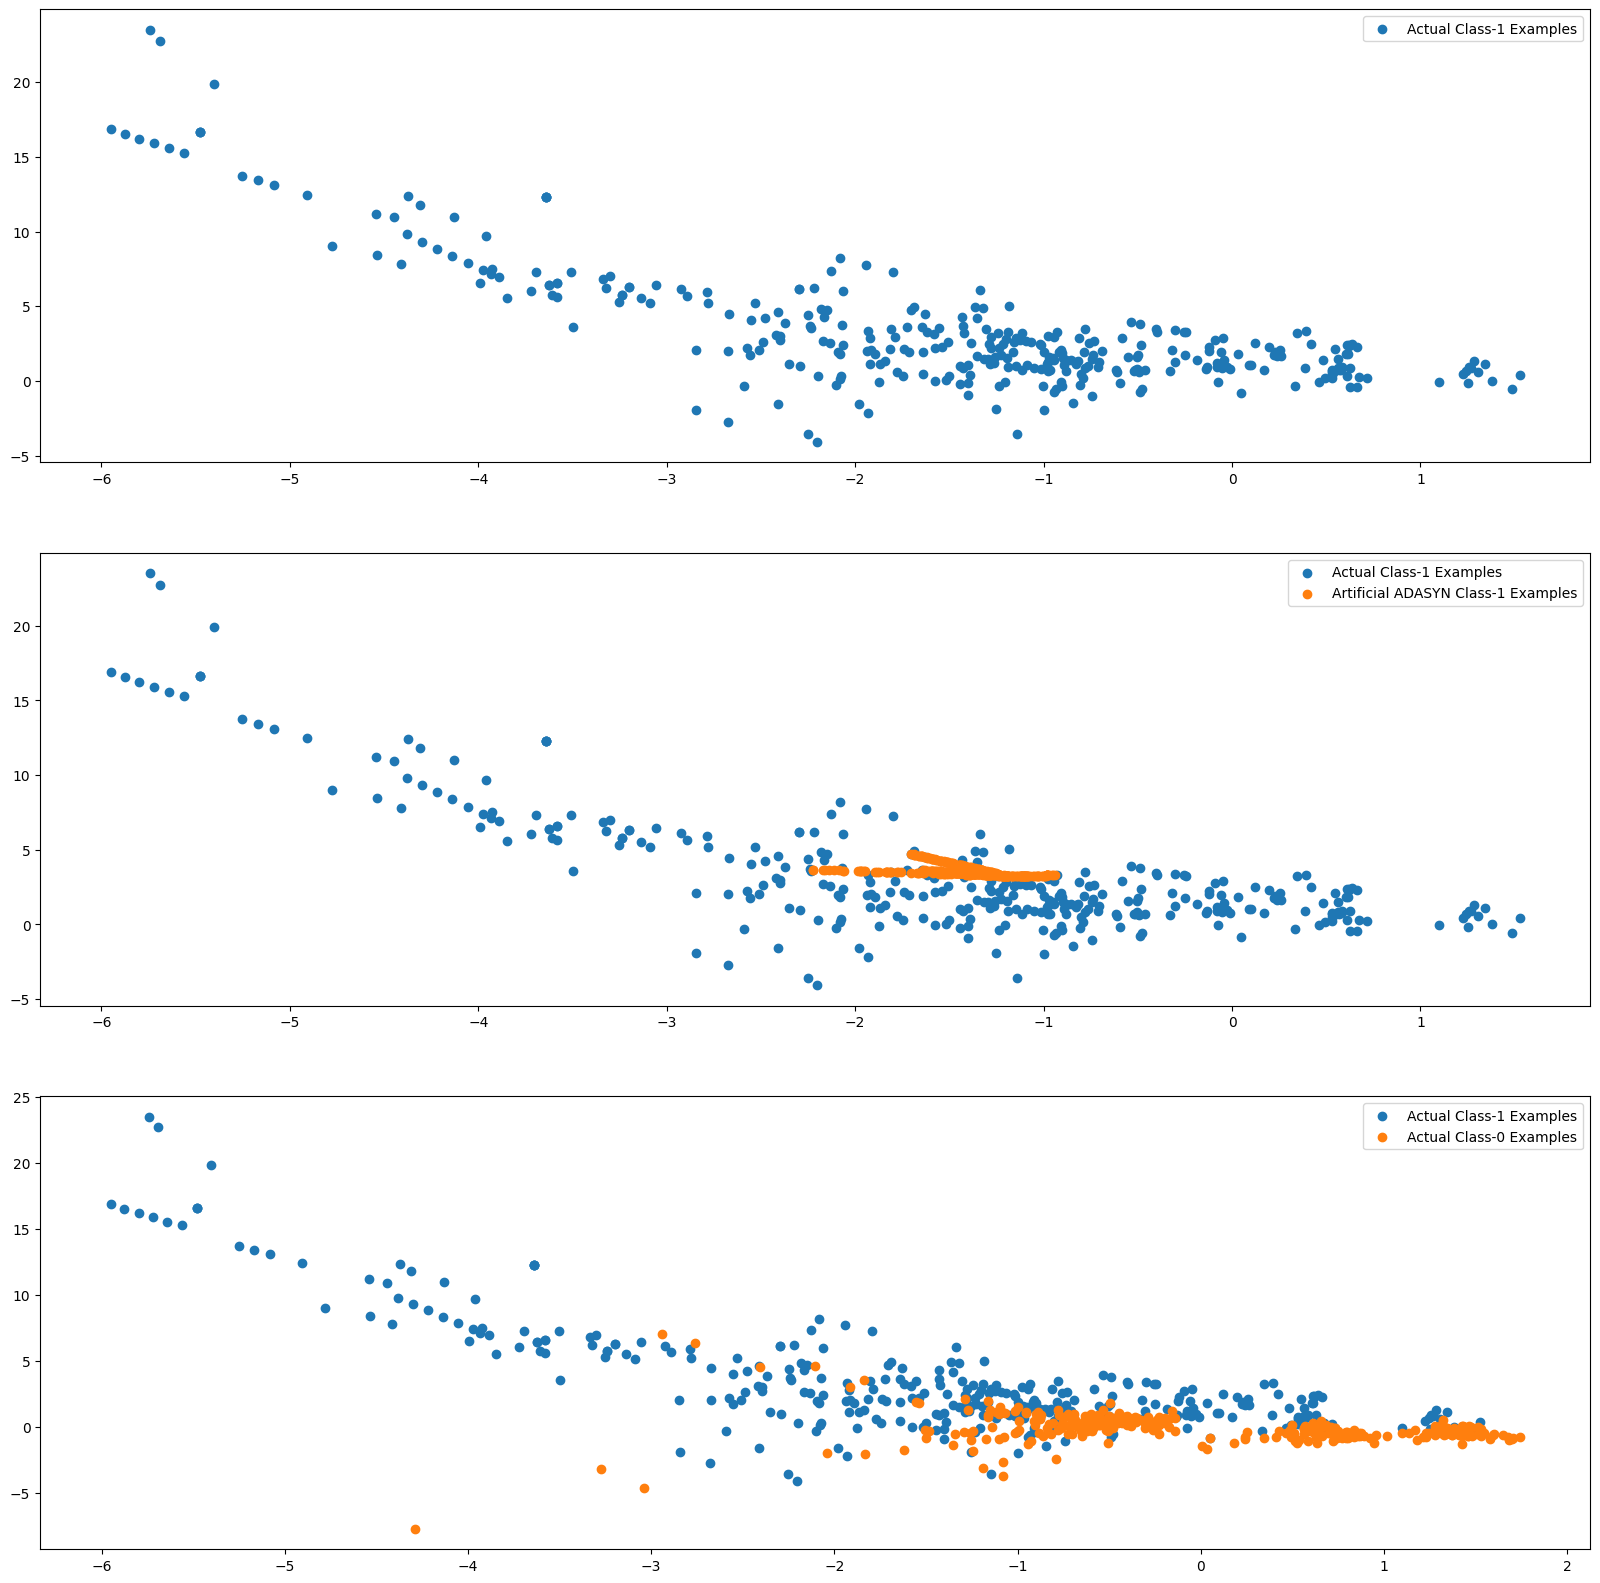

In [42]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

- **Top Plot**: The initial distribution of the minority class (Class 1).

- **Middle Plot**: How ADASYN generates synthetic samples for the minority class. The key difference from SMOTE is ADASYN's adaptive nature, which might focus on creating more samples for harder-to-learn minority instances, potentially leading to a more strategic distribution of synthetic data.

- **Bottom Plot**: The original imbalanced distribution of both classes, highlighting the disparity in sample counts that makes oversampling techniques like ADASYN necessary for better model training.

In [43]:
from imblearn import over_sampling 
from imblearn.pipeline import Pipeline

# Define hyperparameter grid for tuning: regularization strength 'C' and penalty type
lr_params = {
    'classifier__C': num_C,
    'classifier__penalty': ['l1', 'l2']
}

# Prepare a list to store results for Logistic Regression across different cross-validation folds
results['Logistic Regression ADASYN'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Create a pipeline with: ADASYN to balance the class distribution, Logistic Regression classifier with balanced class weights    
    pipeline = Pipeline([
        ('balancing', over_sampling.ADASYN(random_state=42)),
        ('classifier', linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
    ])

    # Set up GridSearchCV with Logistic Regression, hyperparameter grid, ROC AUC scoring,
    # and Stratified K-Fold cross-validation to preserve class distribution in each fold
    grid = GridSearchCV(estimator=pipeline, param_grid=lr_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters    
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Logistic Regression ADASYN'].append({
        'model': 'Logistic Regression',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [81]:
adasyn = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['Logistic Regression ADASYN'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = linear_model.LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, **best_params)
final_model.fit(X_train_adasyn, y_train_adasyn)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9753859266645032
Best Hyperparameters: {'C': 0.001, 'penalty': 'l1'}
Test ROC AUC: 0.9852283505487396


##### Build models on other algorithms to see the better performing on ADASYN

In [44]:
# Define hyperparameter grid for Random Forest inside the pipeline
rf_params = {
    'classifier__n_estimators': [50, 100], # Number of trees in the forest
    'classifier__max_depth': [5, 10, 15, 20], # Max depth of each tree
    'classifier__min_samples_split': [2, 5] # Minimum samples required to split a node
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['Random Forest ADASYN'] = []

# Loop over different cross-validation fold numbers to assess model stability and performance
for cv in cv_num : 
    # Define a pipeline that first applies ADASYN for class balancing,
    # then fits the Random Forest classifier
    pipeline = Pipeline([
        ('balancing', over_sampling.ADASYN(random_state=42)),
        ('classifier',  RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
    ])

    # Setup GridSearchCV to tune hyperparameters using ROC AUC as the evaluation metric,
    # with StratifiedKFold CV to preserve class distribution, and parallel processing enabled
    grid = GridSearchCV(estimator=pipeline, param_grid=rf_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)

    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters    
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['Random Forest ADASYN'].append({
        'model': 'Random Forest',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [82]:
adasyn = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['Random Forest ADASYN'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1, **best_params)
final_model.fit(X_train_adasyn, y_train_adasyn)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9806208243034019
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Test ROC AUC: 0.9861504912094189


In [45]:
# Define hyperparameter grid for XGBoost inside the pipeline
xgb_params = {
    'classifier__n_estimators': [50, 100,200],
    'classifier__max_depth': [2, 3, 5, 10],
    'classifier__learning_rate': [0.1, 0.2, 0.6],
    'classifier__subsample': [0.3, 0.6, 0.9]
}

# Prepare a list to store results for Random Forest across different cross-validation folds
results['XGBoost ADASYN'] = []

for cv in cv_num : 
    # Define a pipeline that first applies ADASYN for class balancing, then fits the  XGBoost
    pipeline = Pipeline([
        ('balancing', over_sampling.ADASYN(random_state=42)),
        ('classifier',  XGBClassifier())
    ])

    # Setup GridSearchCV to tune hyperparameters using ROC AUC as the evaluation metric,
    # with StratifiedKFold CV to preserve class distribution, and parallel processing enabled
    grid = GridSearchCV(estimator=pipeline, param_grid=xgb_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), n_jobs=-1)
    
    # Fit GridSearch to training data (X_train_cv, y_train_cv) to find best hyperparameters        
    grid.fit(X_train_cv, y_train_cv)
    
    # Collect and store the best ROC AUC score and corresponding hyperparameters for this CV fold count
    results['XGBoost ADASYN'].append({
        'model': 'XGBoost',
        'cv' : cv,
        'roc_auc': grid.best_score_,
        'best_params': grid.best_params_
    })

In [83]:
adasyn = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_cv, y_train_cv)

# Select best model (highest ROC AUC)
best_result = max(results['XGBoost ADASYN'], key=lambda x: x['roc_auc'])

# Evaluate best model on test set
best_params = best_result['best_params']
best_params = {
    key.split('__')[1]: value
    for key, value in best_params.items()
    if key.startswith('classifier__')
}

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_adasyn, y_train_adasyn)

# Evaluate on true test set
test_preds = final_model.predict_proba(X_test_cv)[:, 1]
final_test_auc = roc_auc_score(y_test_cv, test_preds)

# Print results
print("Best CV ROC AUC:", best_result['roc_auc'])
print("Best Hyperparameters:", best_params)
print("Test ROC AUC:", final_test_auc)

Best CV ROC AUC: 0.9783275040099095
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.6}
Test ROC AUC: 0.9897190503593519


### Combine Hyperparameter Tuning Results from Multiple Models into a Single DataFrame

In [46]:
from IPython.display import display

# Initialize an empty list to collect DataFrames from each model
df_list = []

# Loop through each model in your results dictionary
for model_name, model_results in results.items():
    # Convert model's list of dicts to DataFrame
    df_model = pd.DataFrame(model_results)
    
    # Add a column for the model name with CV appended, e.g., "KNN_5"
    df_model['model_cv'] = df_model.apply(lambda row: f"{model_name}_{row['cv']}", axis=1)
    
    # Append this model's DataFrame to the list
    df_list.append(df_model)

# Concatenate all model DataFrames into one big DataFrame, row-wise
df_all_results = pd.concat(df_list, ignore_index=True)

# Reorder columns if you like, e.g., model_cv first
df_all_results = df_all_results[['model_cv', 'model', 'cv', 'roc_auc', 'best_params']]

# Sorted by ROC AUC (descending) to highlight best performers
df_all_results = df_all_results.sort_values(by="roc_auc", ascending=False)

# Pretty print
print("\n📊 Model Comparison (Sorted by ROC AUC):")
display(df_all_results)


📊 Model Comparison (Sorted by ROC AUC):


,model_cv,model,cv,roc_auc,best_params
10,XGBoost ROS_7,XGBoost,7,0.982150,"{'classifier__learning_rate': 0.2, 'classifier..."
18,Random Forest SMOTE_7,Random Forest,7,0.982062,"{'classifier__max_depth': 10, 'classifier__min..."
9,XGBoost ROS_5,XGBoost,5,0.981940,"{'classifier__learning_rate': 0.2, 'classifier..."
17,Random Forest SMOTE_5,Random Forest,5,0.981664,"{'classifier__max_depth': 10, 'classifier__min..."
23,XGBoost SMOTE_10,XGBoost,10,0.981511,"{'classifier__learning_rate': 0.2, 'classifier..."
11,XGBoost ROS_10,XGBoost,10,0.980704,"{'classifier__learning_rate': 0.1, 'classifier..."
30,Random Forest ADASYN_7,Random Forest,7,0.980621,"{'classifier__max_depth': 5, 'classifier__min_..."
7,Random Forest ROS_10,Random Forest,10,0.980500,"{'classifier__max_depth': 10, 'classifier__min..."
21,XGBoost SMOTE_5,XGBoost,5,0.980240,"{'classifier__learning_rate': 0.1, 'classifier..."
19,Random Forest SMOTE_10,Random Forest,10,0.980209,"{'classifier__max_depth': 5, 'classifier__min_..."


In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [48]:
# Pick the top model from sorted results
best_model = df_all_results.index[0]
best_model_name = df_all_results.loc[best_model, 'model']
best_params = df_all_results.loc[best_model, 'best_params']

print(f"\n✅ Proceeding with best model: {best_model_name}")
print(f"🔧 Best hyperparameters: {best_params}")


✅ Proceeding with best model: XGBoost
🔧 Best hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'classifier__subsample': 0.6}


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [57]:
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

clf = XGBClassifier(**best_params) #initialise the model with optimum hyperparameters
clf.fit(X_train_ros, y_train_ros)

# Use predicted probabilities if available
if hasattr(clf, "predict_proba"):
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"\n🧪 ROC AUC on test set: {roc_auc:.4f}")

# Accuracy and classification report
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy on test set: {acc:.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred)) 


🧪 ROC AUC on test set: 0.9664
✅ Accuracy on test set: 0.9995

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


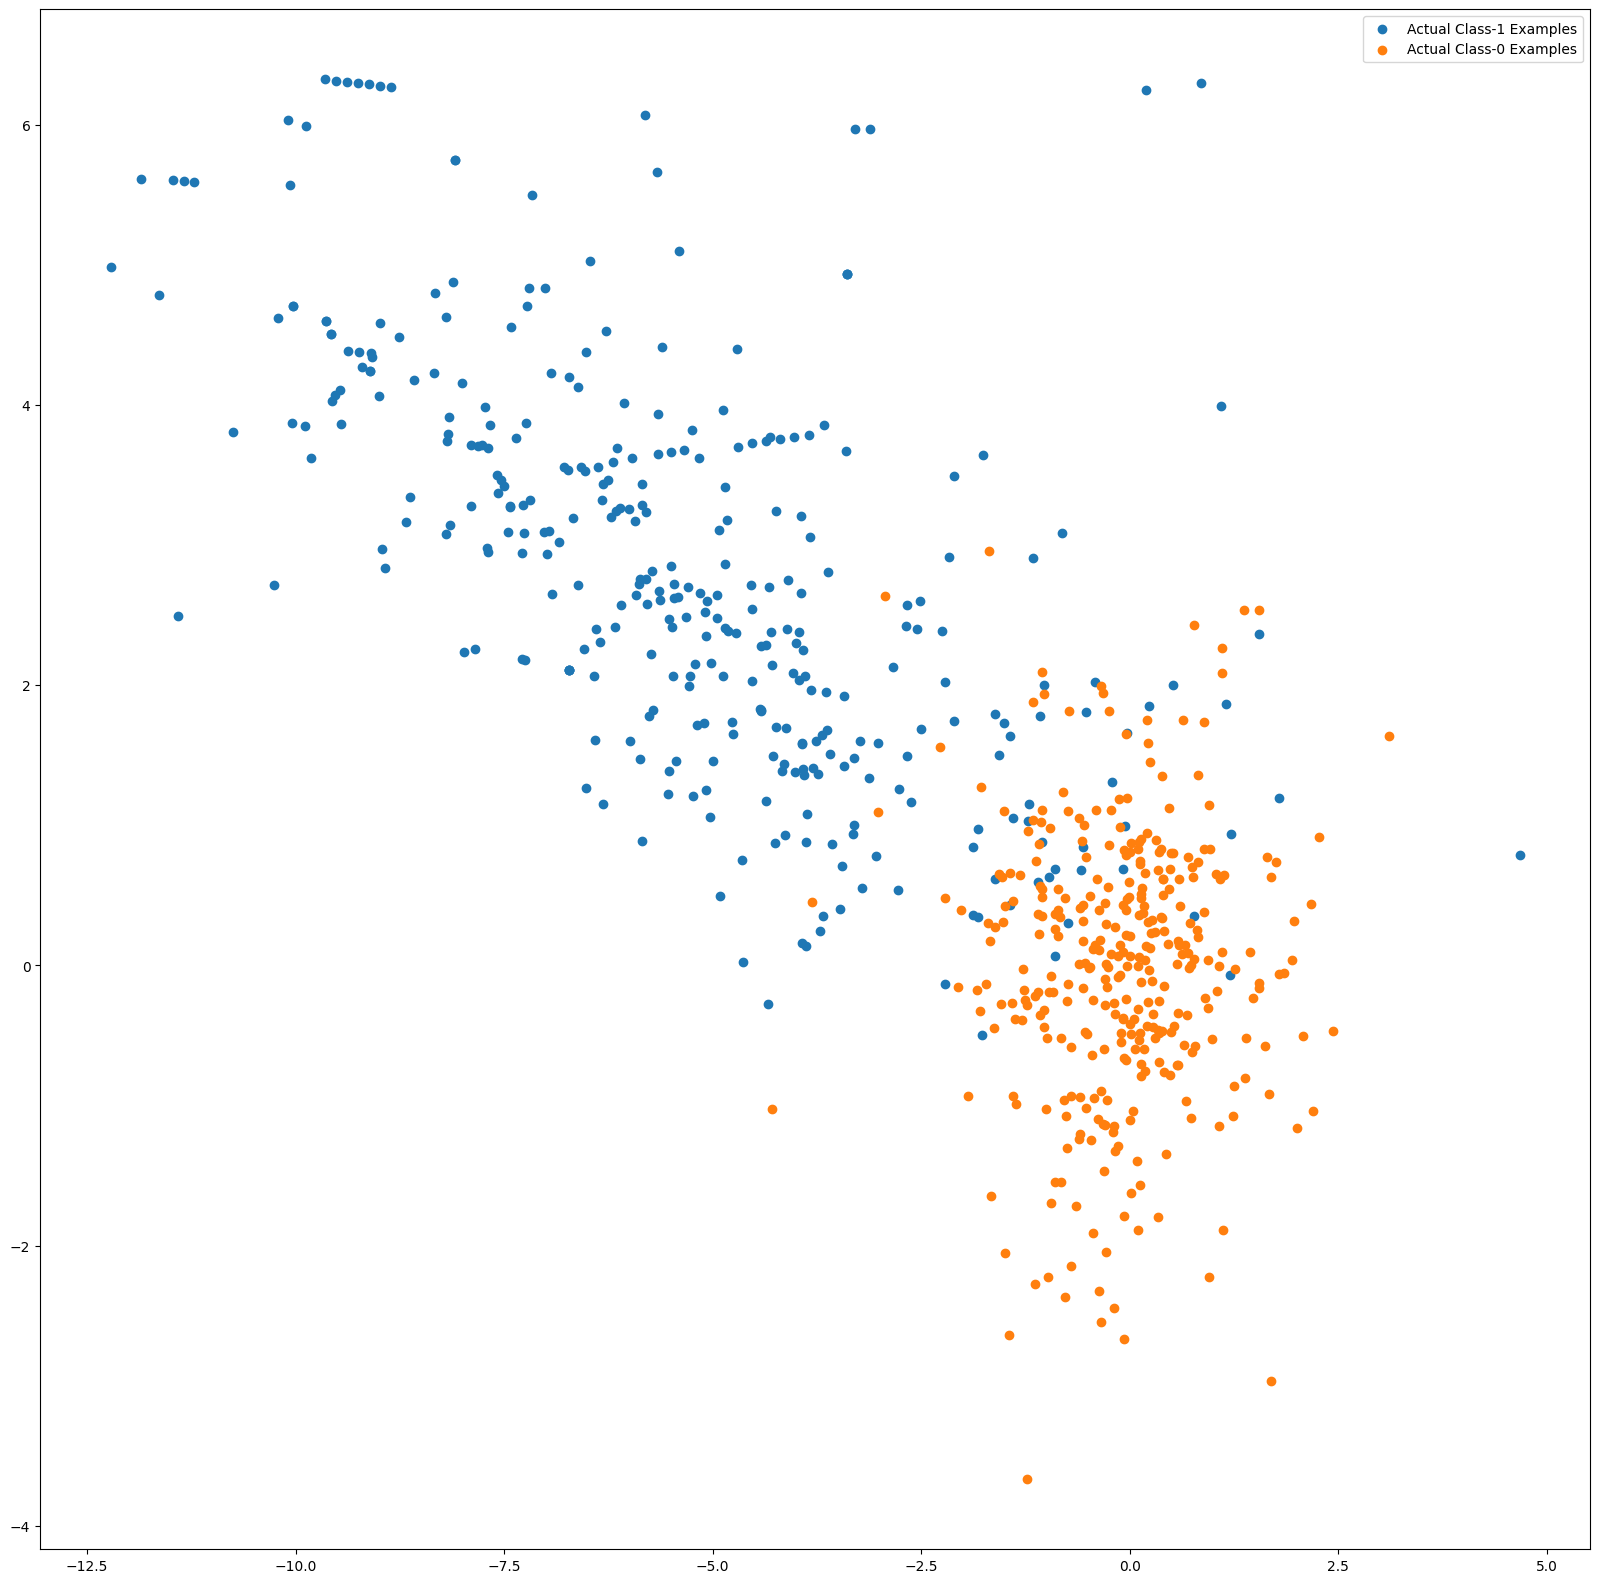

In [61]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [60]:
# Predict probabilities for class 1 on training data
y_train_probs = clf.predict_proba(X_train_ros)[:, 1]

# Compute and print AUC score for training data
print('Train AUC =', metrics.roc_auc_score(y_train_ros, y_train_probs))

# Get FPR, TPR, thresholds from the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_ros, y_train_probs)

# Find the optimal threshold (Youden's J statistic)
threshold = thresholds[np.argmax(tpr - fpr)]

# Print the optimal threshold
print('Best Threshold =', threshold)

Train AUC = 1.0
Best Threshold = 0.9996499


Using XGBoost with class imbalance handling (e.g., SMOTE) resulted in near-perfect performance on the training data (AUC = 1.0). The optimal decision threshold (~0.99965) indicates the model sets a very high confidence cut-off to classify positives, reflecting a conservative approach to fraud detection after balancing. This threshold helps effectively balance false positives and false negatives given the rarity of the minority class.

In [63]:
# Predict probabilities for class 1 on test data
y_test_probs = clf.predict_proba(X_test)[:, 1]

# Compute and print AUC score for test data
print('Test AUC =', metrics.roc_auc_score(y_test, y_test_probs))

# Get FPR, TPR, thresholds from the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_probs)

# Find the optimal threshold (Youden's J statistic)
threshold = thresholds[np.argmax(tpr - fpr)]

# Print the optimal threshold
print('Best Threshold =', threshold)

Test AUC = 0.9664190496258613
Best Threshold = 8.94449e-05


#### Observation

- On this training data, the model performed almost perfectly (AUC = 1.0), meaning it learned to separate fraud and non-fraud very well.

- The best threshold for deciding if a transaction is fraud on training data was very high (~0.9996), meaning the model was very confident and only flagged fraud when the predicted probability was near 100%.

- On the test data, which reflects real-world imbalanced conditions (fraud is rare), the model’s performance was excellent but a bit lower (AUC ≈ 0.9664).

- The best threshold on the test data was very low (~0.0000894), meaning the model needs to flag fraud even at a very small predicted probability because fraud cases are so rare.

### Performance Comparison of Best Model on Test Set Before and After Handling Class Imbalance

| Metric                   | Before Handling | After Handling (ROS/SMOTE/ADASYN) |
|--------------------------|----------------:|---------------------------:|
| ROC AUC                  | 0.9674          | 0.9664                    |
| Accuracy                 | 0.9994          | 0.9995                    |
| Precision (Fraud Class)  | 0.91            | 0.90                      |
| Recall (Fraud Class)     | 0.72            | 0.78                      |
| F1-Score (Fraud Class)   | 0.81            | 0.84                      |
| Macro F1-Score           | 0.90            | 0.92                      |

---

### Interpretation of Results

Applying class imbalance handling techniques such as Random Over Sampling (ROS) and SMOTE led to a meaningful improvement in recall and F1-score for the minority fraud class, indicating better identification of fraudulent transactions. While ROC AUC and accuracy remain stable, the improved recall demonstrates the model’s enhanced ability to catch more fraud cases, which is critical in this domain. The slight dip in precision is a reasonable trade-off given the significant gains in recall.

---

### Cost-Benefit Analysis

**Benefits:**

- Higher recall reduces the risk of missed fraud cases, decreasing potential financial and reputational losses.
- The increase in F1-score signals more balanced and reliable performance across classes.
- Stable overall ROC AUC and accuracy ensure consistent ranking and decision quality for the majority class.

**Trade-offs:**

- Slight decrease in precision, which might increase false positive alerts and operational workload.
- Additional training complexity and compute resources due to oversampling techniques.

The improvements in fraud detection outweigh the minor costs, making class imbalance handling a worthwhile investment.

---

### Key Insights and Recommendations

- Incorporate imbalance handling techniques (ROS, SMOTE) in the modeling pipeline to boost minority class detection.
- Carefully tune classification thresholds to optimize the precision-recall balance based on business risk appetite.
- Explore cost-sensitive learning methods to directly embed fraud cost into model training.
- Leverage ensemble models and ongoing feature engineering to further refine detection capabilities.
- Implement continuous monitoring for model drift and imbalance changes to maintain peak performance.

---

### Conclusion

Effectively addressing class imbalance is essential to elevate fraud detection performance, enabling the model to catch more fraudulent activity without sacrificing overall stability. The slight trade-offs in precision and complexity are justified by substantial gains in recall and practical fraud identification. For deployment, validate the model with live data, engage domain experts for threshold calibration, and continue refining with cost-sensitive approaches to maximize real-world impact.

---